# Visualization of classification results
The three analyses - the benchmark, ROI-average, and cluster-average analysis - are visualized below.

In [9]:
# Importing packages
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
from matplotlib import lines
from scipy.stats import linregress, ttest_1samp
import pandas as pd
import numpy as np
import os
from os.path import join as opj
import seaborn as sns

# Setting some global variables
colors = sns.color_palette()
home = os.path.expanduser('~')
resultsdir = '/home/lukas/Dropbox/PhD_projects/DynamicAffect_Multiscale/Git/Analysis_results'

## 1. Benchmark analysis

    accuracy  corr_vox  fs_count  fs_prop   fs_std               mask  \
0      0.583     0.535   955.712    0.004  164.432  GrayMatter.nii.gz   
1      0.458     0.193  1571.207    0.006  222.295  GrayMatter.nii.gz   
2      0.533     0.458   819.154    0.003  168.905  GrayMatter.nii.gz   
3      0.392     0.276   532.656    0.002  154.759  GrayMatter.nii.gz   
4      0.625     0.302  1728.462    0.006  214.107  GrayMatter.nii.gz   
5      0.667     0.225   295.290    0.001   86.483  GrayMatter.nii.gz   
6      0.625     0.461  1387.719    0.005  225.994  GrayMatter.nii.gz   
7      0.392     0.113   579.258    0.002  164.502  GrayMatter.nii.gz   
8      0.775     0.700  1062.435    0.004  137.492  GrayMatter.nii.gz   
9      0.717     0.222  2299.678    0.009  394.615  GrayMatter.nii.gz   
10     0.708     0.318   654.570    0.002  151.439  GrayMatter.nii.gz   
11     0.708     0.581   623.141    0.002  147.991  GrayMatter.nii.gz   

    precision  recall  sub_name  
0       0.596   

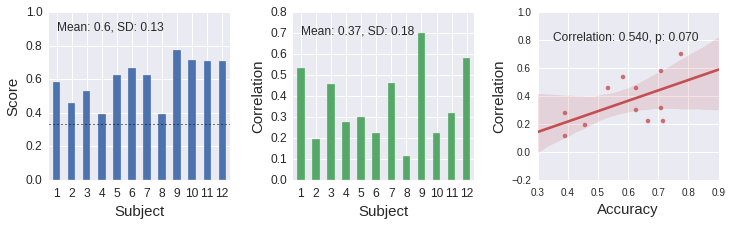

In [34]:
# Reading in data, some cleaning
filepath = opj(resultsdir, 'benchmark_results.csv')
data1 = pd.read_csv(filepath, sep=',', skiprows=22)
data1 = data1.dropna(how='any')
data1['fs_count'] = data1['fs_count'].astype(float)
data1['sub_name'] = np.arange(1, len(data1.index)+1)

# Some descriptives to include in plots
mean_score = np.round(data1['accuracy'].mean(), 2)
std_score = np.round(data1['accuracy'].std(), 2)
mean_feat = np.round(data1['fs_count'].mean(), 0)
std_feat = np.round(data1['fs_count'].std(), 0)
mean_corr = np.round(data1['corr_vox'].mean(), 2)
std_corr = np.round(data1['corr_vox'].std(), 2)

### Start plotting! ###
fig, axes = plt.subplots(1,3)

# Plot 1: Accuracy
data1.plot(kind='bar', x='sub_name', y='accuracy', 
           legend=False, ax=axes[0], rot=0, fontsize=12, figsize=(12, 3), ylim=(0,1))

axes[0].axhline(y=0.333, c="black", linewidth=1, ls=':')
axes[0].set_ylabel('Score', fontsize=15)
axes[0].set_xlabel('Subject', fontsize=15)
axes[0].text(0, 0.9, 'Mean: %s, SD: %s' % (mean_score, std_score), size=12)

# Plot 2: Correlations across features
data1.plot(kind='bar', x='sub_name', y='corr_vox', legend=False, 
              rot=0, ylim=(0, 0.8), fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('Correlation', fontsize=15)
axes[1import nilearn
].text(0, 0.7, 'Mean: %s, SD: %s' % (mean_corr, std_corr), size=12)

# Some tick parameters
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off')

# Plot 3: Correlation between accuracy and correlation between features
slope, intercept, r, p, stderr = linregress(data1['accuracy'], data1['corr_vox'])
axes[2] = sns.regplot(x='accuracy', y='corr_vox', data=data1, color=colors[2])
axes[2].set_xlabel('Accuracy', fontsize=15)
axes[2].set_ylabel('Correlation', fontsize=15)
axes[2].text(.35, 0.8, 'Correlation: %.3f, p: %.3f' % (r, p), size=12)

# Save plots
plt.subplots_adjust(wspace=0.35)
plt.savefig(opj(resultsdir, 'benchmark_plot.png'), dpi=600, bbox_inches='tight')

print data1

### Statistics for benchmark analysis

In [3]:
# T-test of average feature correlation
t_val1, p_val1 = ttest_1samp(data1['corr_vox'], 0)
print "One-sample t-test (against 0) of average correlation of features yields: " \
"T-value = %.3f and p-value is %.5f" % (t_val1, p_val1)

# T-test of accuracy against chance
t_val2, p_val2 = ttest_1samp(data1['accuracy'], 1/3.0)
print "One-sample t-test of accuracy (against chance, 1/3) yields: " \
"T-value = %.3f and p-value is %.5f" % (t_val2, p_val2)


One-sample t-test (against 0) of average correlation of features yields: T-value = 7.066 and p-value is 0.00002
One-sample t-test of accuracy (against chance, 1/3) yields: T-value = 7.089 and p-value is 0.00002


## 2. ROI-average analysis


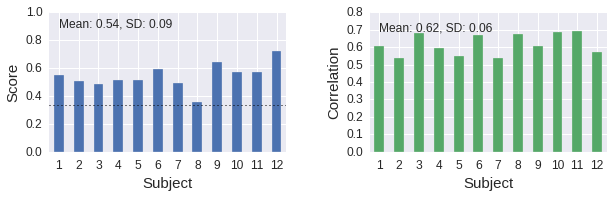

In [6]:
# Reading in data, some cleaning
filepath = opj(resultsdir, 'ROI_average_results.csv')
data2 = pd.read_csv(filepath, sep=',', skiprows=22)
data2 = data2.dropna(how='any')
data2['fs_count'] = data2['fs_count'].astype(float)
data2['sub_name'] = np.arange(1, len(data2.index) + 1)

# Plotting accuracy and number of features
mean_score = np.round(data2['accuracy'].mean(), 2)
std_score = np.round(data2['accuracy'].std(), 2)
mean_feat = np.round(data2['fs_count'].mean(), 0)
std_feat = np.round(data2['fs_count'].std(), 0)
mean_corr = np.round(data2['corr_vox'].mean(), 2)
std_corr = np.round(data2['corr_vox'].std(), 2)

fig, axes = plt.subplots(1,2)

data2.plot(kind='bar', x='sub_name', y='accuracy', legend=False, rot=0, fontsize=12, 
          ylim=(0,1), ax=axes[0], figsize=(10, 2.5))

axes[0].axhline(y=0.3333, c="black", linewidth=1, ls=':')
axes[0].set_ylabel('Score', fontsize=15)
axes[0].set_xlabel('Subject', fontsize=15)
axes[0].text(0, 0.9, 'Mean: %s, SD: %s' % (mean_score, std_score), size=12)

'''
data.plot(kind='bar', x='sub_name', y='fs_count', legend=False, 
              rot=0, fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('# Features', fontsize=15)
axes[1].text(0, 2250, 'Mean: %s, SD: %s' % (mean_feat, std_feat), size=12)
'''

data2.plot(kind='bar', x='sub_name', y='corr_vox', legend=False, 
              rot=0, ylim=(0, 0.8), fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('Correlation', fontsize=15)
axes[1].text(0, 0.7, 'Mean: %s, SD: %s' % (mean_corr, std_corr), size=12)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off')

plt.subplots_adjust(wspace=0.35)
plt.savefig(opj(resultsdir, 'ROI_average_plot.png'), dpi=600, bbox_inches='tight')

#slope, intercept, r, p, stderr = linregress(data['accuracy'], data['corr_vox'])
#axes[2] = sns.regplot(x='accuracy', y='corr_vox', data=data, color=colors[2])
#axes[2].set_xlabel('Accuracy', fontsize=15)
#axes[2].set_ylabel('Correlation', fontsize=15)
#axes[2].text(.35, 0.7, 'Correlation: %.3f, p: %.3f' % (r, p), size=12)

In [7]:
# T-test of average feature correlation
t_val1, p_val1 = ttest_1samp(data2['corr_vox'], 0)
print "One-sample t-test (against 0) of average correlation of features yields: " \
"T-value = %.3f and p-value is %.5f" % (t_val1, p_val1)

# T-test of accuracy against chance
t_val2, p_val2 = ttest_1samp(data2['accuracy'], 1/3.0)
print "One-sample t-test of accuracy (against chance, 1/3) yields: " \
"T-value = %.3f and p-value is %.5f" % (t_val2, p_val2)

print "mean features: %.3f, SD features: %.3f" % (np.mean(data2['fs_count']), np.std(data2['fs_count']))
print "percent reduction: %.3f" % ((1042-33.566) / 1042.0)

One-sample t-test (against 0) of average correlation of features yields: T-value = 35.641 and p-value is 0.00000
One-sample t-test of accuracy (against chance, 1/3) yields: T-value = 8.069 and p-value is 0.00001
mean features: 33.566, SD features: 3.440
percent reduction: 0.968


## 3. Cluster-average

    accuracy  cluster_count  corr_vox  fs_count  fs_prop  fs_std  \
0      0.633        23.2236     0.358    23.224        1   2.309   
1      0.500        32.2149     0.199    32.215        1   3.244   
2      0.567        26.4479     0.427    26.448        1   2.788   
3      0.492        26.4304     0.279    26.430        1   3.307   
4      0.633        30.7932     0.262    30.793        1   2.454   
5      0.675        26.4421     0.235    26.442        1   3.185   
6      0.525        26.0918     0.214    26.092        1   2.586   
7      0.358        31.8952     0.123    31.895        1   4.663   
8      0.717        20.9186     0.256    20.919        1   2.544   
9      0.625        24.3172     0.274    24.317        1   2.262   
10     0.783        33.5531     0.303    33.553        1   2.797   
11     0.808        23.2872     0.249    23.287        1   2.696   

                 mask  precision  recall  sub_name  
0   GrayMatter.nii.gz      0.637   0.633         1  
1   GrayM

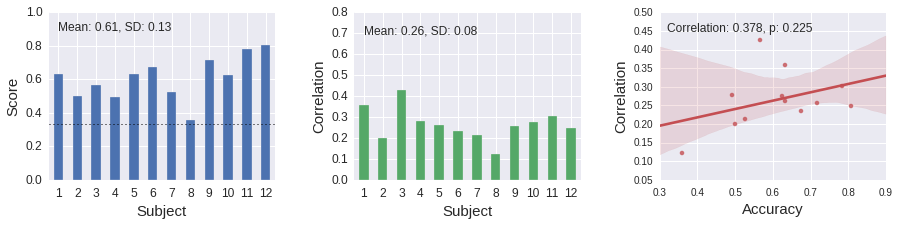

In [35]:
# Reading in data, some cleaning
filepath = opj(resultsdir, 'Cluster_average_results.csv')
data3 = pd.read_csv(filepath, sep=',', skiprows=22)
data3 = data3.dropna(how='any')
data3['fs_count'] = data3['fs_count'].astype(float)
data3['sub_name'] = np.arange(1, len(data3.index) + 1)

# Plotting accuracy and number of features
mean_score = np.round(data3['accuracy'].mean(), 2)
std_score = np.round(data3['accuracy'].std(), 2)
mean_feat = np.round(data3['fs_count'].mean(), 0)
std_feat = np.round(data3['fs_count'].std(), 0)
mean_corr = np.round(data3['corr_vox'].mean(), 2)
std_corr = np.round(data3['corr_vox'].std(), 2)

fig, axes = plt.subplots(1,3)

data3.plot(kind='bar', x='sub_name', y='accuracy', legend=False, rot=0, fontsize=12, 
          ylim=(0,1), ax=axes[0], figsize=(15, 3))

axes[0].axhline(y=0.333, c="black", linewidth=1, ls=':')
axes[0].set_ylabel('Score', fontsize=15)
axes[0].set_xlabel('Subject', fontsize=15)
axes[0].text(0, 0.9, 'Mean: %s, SD: %s' % (mean_score, std_score), size=12)

'''
data.plot(kind='bar', x='sub_name', y='fs_count', legend=False, 
              rot=0, fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('# Features', fontsize=15)
axes[1].text(0, 2250, 'Mean: %s, SD: %s' % (mean_feat, std_feat), size=12)
'''

data3.plot(kind='bar', x='sub_name', y='corr_vox', legend=False, 
              rot=0, ylim=(0, 0.8), fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('Correlation', fontsize=15)
axes[1].text(0, 0.7, 'Mean: %s, SD: %s' % (mean_corr, std_corr), size=12)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off')

slope, intercept, r, p, stderr = linregress(data3['accuracy'], data3['corr_vox'])
axes[2] = sns.regplot(x='accuracy', y='corr_vox', data=data3, color=colors[2])
axes[2].set_xlabel('Accuracy', fontsize=15)
axes[2].set_ylabel('Correlation', fontsize=15)
axes[2].text(.32, 0.45, 'Correlation: %.3f, p: %.3f' % (r, p), size=12)

plt.subplots_adjust(wspace=0.35)
plt.savefig(opj(resultsdir, 'Cluster_average_plot.png'), dpi=600, bbox_inches='tight')
print data3

In [66]:
t, p = ttest_1samp(data3['accuracy'], .333333)
print "T-value = %.3f and p-value is %.3f" % (t, p)

print "mean features: %.3f and std features: %.3f" % (data3['fs_count'].mean(), data3['fs_count'].std())
print "reduction: %.3f" % ((1024-data3['fs_count'].mean())/1024)

T-value = 7.388 and p-value is 0.000
mean features: 27.135 and std features: 4.070
reduction: 0.974


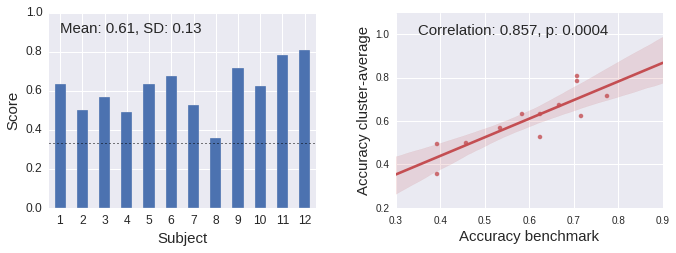

In [29]:
fig, axes = plt.subplots(1,2)

data3.plot(kind='bar', x='sub_name', y='accuracy', legend=False, rot=0, fontsize=12, 
          ylim=(0,1), ax=axes[0], figsize=(11, 3.5))

axes[0].axhline(y=0.333, c="black", linewidth=1, ls=':')
axes[0].set_ylabel('Score', fontsize=15)
axes[0].set_xlabel('Subject', fontsize=15)
axes[0].text(0, 0.9, 'Mean: %s, SD: %s' % (mean_score, std_score), size=15)

slope, intercept, r, p, stderr = linregress(data1['accuracy'], data3['accuracy'])
newdf = pd.DataFrame()
newdf['benchmark'] = data1['accuracy']
newdf['cluster-average'] = data3['accuracy']

ax = sns.regplot(x='benchmark', y='cluster-average', data=newdf, color=colors[2])
ax.set_xlabel('Accuracy benchmark', fontsize=15)
ax.set_ylabel('Accuracy cluster-average', fontsize=15)
ax.text(.35, 1, 'Correlation: %.3f, p: %.4f' % (r, p), size=15)

plt.subplots_adjust(wspace=0.3)
plt.savefig(opj(resultsdir, 'Cluster_average_plot_new.png'), dpi=600, bbox_inches='tight')


## 4. Comparison of analyses

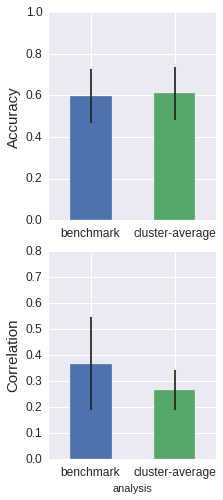

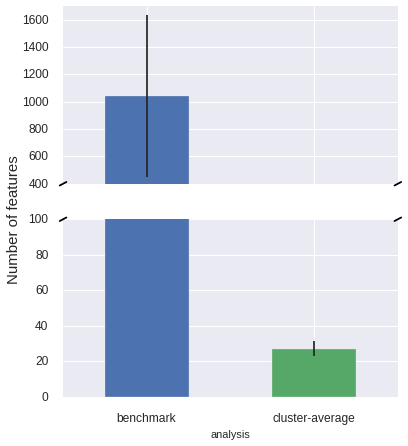

In [42]:
data4 = pd.DataFrame({'analysis': ['benchmark', 'cluster-average'],
                      'acc_av': [data1['accuracy'].mean(), data3['accuracy'].mean()],
                      'acc_std': [data1['accuracy'].std(), data3['accuracy'].std()],
                      'corr_av': [data1['corr_vox'].mean(), data3['corr_vox'].mean()],
                      'corr_std': [data1['corr_vox'].std(), data3['corr_vox'].std()],
                      'feat_av': [data1['fs_count'].mean(), data3['fs_count'].mean()],
                      'feat_std': [data1['fs_count'].std(), data3['fs_count'].std()]})

fig, axes = plt.subplots(2,1)
data4.plot(kind='bar', x='analysis', y='acc_av', legend=False, 
              rot=0, ylim=(0, 1), fontsize=12, color=colors, yerr='acc_std', ax=axes[0], figsize=(3, 8))
data4.plot(kind='bar', x='analysis', y='corr_av', legend=False, 
              rot=0, ylim=(0, 0.8), fontsize=12, color=colors, yerr='corr_std', ax=axes[1])

#axes[0].set_xticklabels([])
axes[0].set_xlabel('')
axes[0].set_ylabel('Accuracy', fontsize=15)
axes[1].set_ylabel('Correlation', fontsize=15)

plt.subplots_adjust(hspace=0.15)
plt.savefig(opj(resultsdir, 'overview1.png'), dpi=600, bbox_inches='tight')

### n-features ###
fig, axis = plt.subplots(2, 1, sharex=True)
data4.plot(kind='bar', x='analysis', y='feat_av', legend=False, 
              rot=0, ylim=(0, 100), fontsize=12, color=colors, yerr='feat_std', ax=axis[0], figsize=(6,7))
data4.plot(kind='bar', x='analysis', y='feat_av', legend=False, 
              rot=0, ylim=(0, 100), fontsize=12, color=colors, yerr='feat_std', ax=axis[1])

axis[0].set_ylim(400, 1700)
axis[0].set_xlabel('')
axis[1].set_ylim(0, 100)
axis[1].legend().set_visible(False)

axis[0].spines['bottom'].set_visible(False)
axis[1].spines['top'].set_visible(False)
axis[0].xaxis.tick_top()
axis[0].tick_params(labeltop='off')
axis[1].xaxis.tick_bottom()

d = .01
kwargs = dict(transform=axis[0].transAxes, color='k', clip_on=False)
axis[0].plot((-d,+d),(-d,+d), **kwargs)
axis[0].plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=axis[1].transAxes)
axis[1].plot((-d,+d),(1-d,1+d), **kwargs)
axis[1].plot((1-d,1+d),(1-d,1+d), **kwargs)

axis[0].tick_params(direction='out', pad=15)
axis[1].tick_params(direction='out', pad=15)
axis[1].set_ylabel('Number of features', fontsize=15)
axis[1].yaxis.set_label_coords(-.125, 1)


plt.savefig(opj(resultsdir, 'overview2.png'), dpi=600, bbox_inches='tight')


In [27]:
from scipy.stats import ttest_ind, f_oneway
f2, p_anova2 = f_oneway(data1['accuracy'], data2['accuracy'], data3['accuracy'])
f, p_anova = f_oneway(data1['corr_vox'], data2['corr_vox'], data3['corr_vox'])

t, p_tt = ttest_ind(data1['corr_vox'], data3['corr_vox'])
print t, p_tt

1.78474651951 0.0881000823609


## Individual ROI results

In [13]:
from scipy.stats import t

filepath = opj(resultsdir, 'unilateral_results.csv')
roidata = pd.read_csv(filepath, sep='\t', skiprows=22).dropna(how='any')
roidata['tvalues'] = (roidata['accuracy_av'] - 1/3.0) / (roidata['accuracy_std']/np.sqrt(12))
roidata['pvalues'] = [t.sf(tval, 11) for tval in roidata['tvalues']]
roidata['signif'] = roidata['pvalues'] < 0.01 / roidata.count()[0]
roidata = roidata[roidata['signif']].sort(columns='pvalues')
roidata = roidata[['accuracy_av', 'accuracy_std', 'tvalues', 'pvalues', 'mask']]
roidata = roidata.set_index('mask')

# Some formatting
roidata['accuracy_av'] = roidata['accuracy_av'].map(lambda x: '%.3f' % x)
roidata['accuracy_std'] = roidata['accuracy_std'].map(lambda x: '%.3f' % x)
roidata['tvalues'] = roidata['tvalues'].map(lambda x: '%.3f' % x)
roidata['pvalues'] = roidata['pvalues'].map(lambda x: '%.6f' % x)

roidata['accuracy_av'] = roidata['accuracy_av'].map(str) + ' (' + roidata['accuracy_std'].map(str) + ')'
roidata = roidata.drop(['accuracy_std'], 1)

print roidata
roidata.to_csv(opj(resultsdir, 'latex_roidata_mult'), sep=',')

                                  accuracy_av tvalues   pvalues
mask                                                           
TemporalFusiform_post_left      0.493 (0.058)   9.602  0.000001
LOC_sup_left                    0.569 (0.090)   9.113  0.000001
MFG_left                        0.562 (0.087)   9.095  0.000001
SupramarginalGyrust_ant_left    0.586 (0.097)   9.007  0.000001
SupramarginalGyrus_post_left    0.597 (0.104)   8.818  0.000001
SFG_right                       0.526 (0.076)   8.791  0.000001
AngularGyrus_right              0.541 (0.084)   8.593  0.000002
ParietalOperculum_right         0.514 (0.074)   8.440  0.000002
SuperiorParietalLobule_left     0.551 (0.090)   8.352  0.000002
TemporalPole_right              0.485 (0.064)   8.289  0.000002
AngularGyrus_left               0.584 (0.106)   8.223  0.000003
STG_post_left                   0.570 (0.107)   7.669  0.000005
TemporalFusiform_ant_left       0.433 (0.045)   7.659  0.000005
MFG_right                       0.525 (0

/home/lukas/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


/home/lukas/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: Please use the shape property instead of get_shape


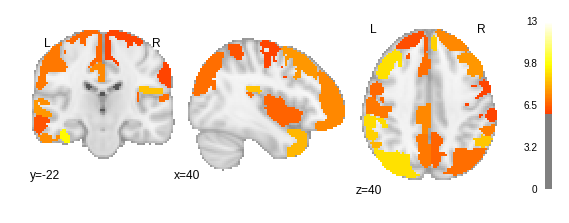

In [46]:
import nibabel as nib
import glob

MNI = nib.load('/usr/share/fsl/5.0/data/standard/MNI152_T1_2mm_brain.nii.gz')
affine = MNI.get_affine()
MNI_dims = MNI.get_shape()
mni = np.zeros(MNI_dims)

masks = glob.glob(opj(resultsdir, 'unilateral','*nii.gz'))
thresh = 40

for mask in masks:
    if os.path.basename(mask)[:-7] in roidata.index:
        mask_mask = nib.load(mask).get_data() > thresh
        mni[mask_mask] = roidata['tvalues'][os.path.basename(mask)[:-7]]

from nilearn.plotting import plot_stat_map
plot_stat_map(nib.Nifti1Image(mni, affine), draw_cross=False, vmax=13, cut_coords=(40, -22, 40),
             display_mode='ortho', threshold=6)
plt.savefig(opj(resultsdir, 'individual_ROIs_tmap.png'))

In [163]:
filepath = opj(resultsdir, 'unilateral_ROIs_averaged.csv')
roidata2 = pd.read_csv(filepath, sep='\t', skiprows=22)
roidata2 = roidata2[['accuracy_av', 'accuracy_std', 'mask']]
roidata2['tvalues'] = (roidata2['accuracy_av'] - 1/3.0) / (roidata2['accuracy_std']/np.sqrt(12))
roidata2['pvalues'] = [t.sf(tval, 11) for tval in roidata2['tvalues']]
roidata2['signif'] = roidata2['pvalues'] < 0.01 / roidata2.count()[0]
roidata2 = roidata2[roidata2['signif']].sort(columns='pvalues')
roidata2 = roidata2.set_index('mask')

# Some formatting
roidata2['accuracy_av'] = roidata2['accuracy_av'].map(lambda x: '%.3f' % x)
roidata2['accuracy_std'] = roidata2['accuracy_std'].map(lambda x: '%.3f' % x)
roidata2['tvalues'] = roidata2['tvalues'].map(lambda x: '%.3f' % x)
roidata2['pvalues'] = roidata2['pvalues'].map(lambda x: '%.6f' % x)

roidata2['accuracy_av'] = roidata2['accuracy_av'].map(str) + ' (' + roidata2['accuracy_std'].map(str) + ')'
roidata2 = roidata2.drop(['accuracy_std', 'signif'], 1)

roidata2.to_csv(opj(resultsdir, 'latex_roidata_uni'), sep=',')
print roidata2

                              accuracy_av tvalues   pvalues
mask                                                       
IntraCalcarineCortex_right  0.404 (0.028)   8.832  0.000001
MTG_ant_left                0.454 (0.049)   8.444  0.000002
IntraCalcarineCortex_left   0.408 (0.032)   8.119  0.000003
TemporalPole_left           0.408 (0.034)   7.636  0.000005
ParietalOperculum_right     0.394 (0.035)   6.056  0.000041
